[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/intel-analytics/BigDL/blob/main/docs/readthedocs/source/doc/Chronos/Howto/how-to-create-forecaster.ipynb)

<style>
    .rst-content blockquote {
        margin-left: 0px;
    }
    
    blockquote > div {
        margin: 1.5625em auto;
        padding: 20px 15px 1px;
        border-left: 0.2rem solid rgb(59, 136, 219);  
        border-radius: 0.2rem;
        box-shadow: 0 0.2rem 0.5rem rgb(0 0 0 / 5%), 0 0 0.0625rem rgb(0 0 0 / 10%);
    }
</style>


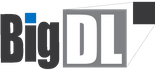

# How to create a Forecaster

## Introduction

In Chronos, Forecaster (`bigdl.chronos.forecaster.Forecaster`) is the forecasting abstraction. It hides the complex logic of model's creation, training, scaling to cluster, tuning, optimization and inferencing while expose some APIs for users to control.

In this guide, we will use the `TCNForecaster` and nyc_taxi datasets as examples to describe **how to create a Forecaster**.

## Prepare Environments

Before creating a forecaster, we need to install Chronos. Chronos supports deep learning backend implemented by pytorch and tensorflow and machine learning methods based on arima and prophet.

In [ ]:
# uncomment following 1 lines for pytorch backend
!pip install --pre --upgrade bigdl-chronos[pytorch]

# uncomment following 2 lines for tensorflow backend
# !pip install --pre --upgrade bigdl-chronos
# !pip install --pre --upgrade bigdl-nano[tensorflow]

# installation trick on colab (no need to do these on your own environment)
!pip uninstall torchtext -y
exit()

## Create a forecaster
We provide two ways to create a Forecaster.

* Create by `Forecaster.from_tsdataset`(**Recommended if valid**)
* Create by `Forecaster(...)` directly

Before creating a Forecaster, We need to know the four parameters `past_seq_len`, `future_seq_len`, `input_feature_num`, `output_feature_num`, which represent the time step and feature column, As shown below.

<img src="../Image/forecast-RR.png" title="time series" style="width:600px">

* **past_seq_len**: Sampled input length, represents the history time step length. (i.e. lookback)
* **future_seq_len**: Sampled output length, represents the output time step length.(i.e. horizon)
* **input_feature_num**: All feature column(s), including extra feature column(s) and target column(s).
* **output_feature_num**: Only target column(s).

More Forecaster info, please refer to [Time Series Forecasting OverView](https://bigdl.readthedocs.io/en/latest/doc/Chronos/Overview/forecasting.html#time-series-forecasting-overview)

If you want to create a traditional statistic forecaster(e.g. [ProphetForecaster](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/forecasters.html#prophetforecaster) or [ARIMAForecaster](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/forecasters.html#arimaforecaster)), you may refer to their API doc directly since they are relatively easy and do not have required parameters to create them.

In [ ]:
# create a TSDataset
from bigdl.chronos.data.repo_dataset import get_public_dataset

tsdataset = get_public_dataset('nyc_taxi', with_split=False)

### Forecaster.from_tsdataset

`from_tsdataset` is a classmethod, so you can call `Forecsater.from_tsdataset`, then input a `TSDataset` instance, where `TSDataset` is a built-in time series preprocessing class.

If the `roll` or `to_torch_data_loader` method has been called by tsdataset, `past_seq_len` and `future_seq_len` do not need to be specified for from_tsdataset, otherwise both must be specified.

In [ ]:
# uncomment following 1 lines for pytorch backend
from bigdl.chronos.forecaster import TCNForecaster

# uncomment following 1 lines for tensorflow backend
# from bigdl.chronos.forecaster.tf import TCNForecaster

tcn = TCNForecaster.from_tsdataset(tsdataset,
                                   past_seq_len=48,
                                   future_seq_len=5)

> 📝 **Note**
>
> We recommend to use `Forecsater.from_tsdataset` if possible. While for some reasons, some forecasters (e.g. `ProphetForecaster` and `ARIMAForecaster`) does not support this API. Or maybe you want to process your data customizedly without using `TSDataset`, you may create a forecaster directly by calling `Forecaster(...)`.

### Create a forecaster directly
You can also create forecaster directly, the parameters mentioned above still need to be specified.

In [ ]:
tcn = TCNForecaster(past_seq_len=48,
                    future_seq_len=5,
                    input_feature_num=2,
                    output_feature_num=2)